# LearnLissajous course evaluation

The objective here is to generate insights based on the resulting data from the course application to a group of heterogenous students

In [1]:
# just reading the files
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
directoryPath = "/home/renan/canvas/LearnLissajous/"
results = {}
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    username = file_name.split("/")[-1][:-4]
    results[username] =  x

### Result for a certain student

In [2]:
pd.DataFrame(results.keys(), columns=["student"]).sort_values("student").reset_index()

,index,student
0,26,bo
1,13,daniel-saravali
2,16,davibai1006
3,28,estknowledge
4,8,felipehu
5,17,fishboy1900
6,29,frederico_schiffner
7,22,gui-lodi
8,0,guipolezel
9,5,h-lefundes


In [3]:
results["joaogrudka"]

,Title,Type,Start time,End time,Graduation,Status
0,Vamos nos conhecer um pouco,Lesson,2021-08-27 02:26:53,2021-08-27 02:26:53,NaN,Completed
1,Introdução,Lesson,2021-08-27 02:31:37,2021-08-27 02:31:37,NaN,Completed
2,Avaliação de conhecimentos prévios,Quiz,2021-08-27 02:31:48,2021-08-27 02:37:25,Passed,Completed
3,Avaliação de conhecimentos prévios (Parte 2),Quiz,2021-08-27 02:37:37,2021-08-27 02:40:36,Passed,Completed
4,Construção geométrica: Curvas e Lugar geométrico,Lesson,2021-08-27 02:45:48,2021-08-27 02:45:48,NaN,Completed
5,Mecanismos que descrevem movimentos harmônicos,Lesson,2021-09-09 18:50:03,2021-09-09 18:50:03,NaN,Completed
6,Projeto de Mecanismo para desenhar padrões de ...,Lesson,2021-09-09 18:51:33,2021-09-09 18:51:33,NaN,Completed
7,Avaliação Final (Parte 1),Quiz,2021-09-09 18:51:44,2021-09-09 19:07:42,Failed,Completed
8,Avaliação Final (Parte 2),Quiz,2021-09-09 19:10:56,2021-09-09 20:04:50,Failed,Completed
9,Avaliação Final (Parte 3),Quiz,2021-09-09 20:45:59,2021-09-09 20:51:21,Passed,Completed


### Aggregated result per question

In [4]:
# aggregating results
brief_result_passed = {}
brief_result_not_passed = {}

for user in results:

    df = results[user]
    df_quiz = df[df["Type"] == "Quiz"]
    quizzes = df_quiz["Title"].tolist()
    passed = df_quiz[df_quiz["Graduation"] == "Passed"]
    not_passed = df_quiz[df_quiz["Graduation"] == "Failed"]

    if len(set(df_quiz["Graduation"].tolist())) == 3:
        continue # skip students who did not take all quizzes

    passed_titles = passed["Title"].tolist()
    not_passed_titles = not_passed["Title"].tolist()

    for quiz in quizzes:
        if quiz not in brief_result_passed:
            brief_result_passed[quiz] = 0
        
        if quiz not in brief_result_not_passed:
            brief_result_not_passed[quiz] = 0

    for title in passed_titles:
        brief_result_passed[title] += 1
        
    for title in not_passed_titles:
        brief_result_not_passed[title] += 1


In [5]:
pd.DataFrame(brief_result_not_passed.items(), columns=["question", "number of students that failed"])

,question,number of students that failed
0,Avaliação de conhecimentos prévios,0
1,Avaliação de conhecimentos prévios (Parte 2),0
2,Avaliação Final (Parte 1),13
3,Avaliação Final (Parte 2),19
4,Avaliação Final (Parte 3),11
5,Avaliação Final (Parte 4),7


In [6]:
pd.DataFrame(brief_result_passed.items(), columns=["question", "number of students that passed"])


,question,number of students that passed
0,Avaliação de conhecimentos prévios,28
1,Avaliação de conhecimentos prévios (Parte 2),27
2,Avaliação Final (Parte 1),9
3,Avaliação Final (Parte 2),2
4,Avaliação Final (Parte 3),10
5,Avaliação Final (Parte 4),14


### Introductory questions separated analysis

Since the 2 introductory questions were meant to measure the previous knowledge, before taking the course, they did not have a minimum value to pass.

Thus we everybody passed.

Now we need to observe how each student performed in the detailed result, not general.

In [7]:
# just reading the files
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
directoryPath = "/home/renan/canvas/LearnLissajousIntro/"
results_question1 = {}
results_question2 = {}
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    a = file_name.split("/")[-1][:-4].split("_")
    username = a[0]
    introductory_question_number = a[1][-1]
    if introductory_question_number == "1":
        results_question1[username] =  x
    if introductory_question_number == "2":
        results_question2[username] =  x

### All students

In [8]:
pd.DataFrame(results_question2.keys(), columns=["student"]).sort_values("student").reset_index()

,index,student
0,24,daniel-saravali
1,9,davibai1006
2,8,estknowledge
3,23,felipehu
4,5,fellipy
5,19,fishboy1900
6,7,gui-lodi
7,15,guipolezel
8,1,h-lefundes
9,25,joaogrudka


### Aggregated result for all students about the 2 introductory questions

In [27]:
all_students = list(set(list(results_question1.keys()) + list(results_question2.keys())))

full_df = None

students_that_did_not_take_both_tests = []

for student in all_students:
    if student not in results_question1 or student not in results_question2:
        students_that_did_not_take_both_tests += [student]
        continue # skipping students that did not take both tests

    student_quadrant = "--"
    if results_question1[student]['Correct'][0] == True and results_question2[student]['Correct'][0] == True:
        student_quadrant = "TT"
    elif  results_question1[student]['Correct'][0] == False and results_question2[student]['Correct'][0] == True:
        student_quadrant = "FT"
    elif  results_question1[student]['Correct'][0] == True and results_question2[student]['Correct'][0] == False:
        student_quadrant = "TF"
    elif  results_question1[student]['Correct'][0] == False and results_question2[student]['Correct'][0] == False:
        student_quadrant = "FF"

    df = pd.concat([results_question2[student], results_question1[student]])
    df["student"] = student
    df["quadrant"] = student_quadrant
    if full_df is None:
        full_df = df
    else:
        full_df = pd.concat([full_df, df])
df_final = full_df.reset_index().drop(['index'], axis=1)
df_final

,Question,Type,Retake,Correct,Retake detail,student,quadrant
0,Frequência angular com Lissajous 2,single_choice,0,True,NaN,topcat,FT
1,Frequência Angular com Lissajous,single_choice,0,False,NaN,topcat,FT
2,Frequência angular com Lissajous 2,single_choice,0,False,NaN,rccampos,TF
3,Frequência Angular com Lissajous,single_choice,0,True,NaN,rccampos,TF
4,Frequência angular com Lissajous 2,single_choice,0,False,NaN,williamcolcioni,FF
5,Frequência Angular com Lissajous,single_choice,0,False,NaN,williamcolcioni,FF
6,Frequência angular com Lissajous 2,single_choice,0,False,NaN,renan,FF
7,Frequência Angular com Lissajous,single_choice,0,False,NaN,renan,FF
8,Frequência angular com Lissajous 2,single_choice,0,False,NaN,lukinhasloko123,FF
9,Frequência Angular com Lissajous,single_choice,0,False,NaN,lukinhasloko123,FF


## Result graphs for the first 2 questions

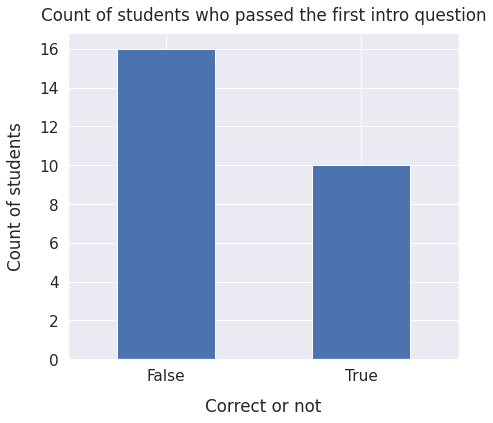

In [14]:
sns.set(font_scale=1.4)
df_final[df_final["Question"] == "Frequência Angular com Lissajous"]["Correct"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Correct or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the first intro question", y=1.02);


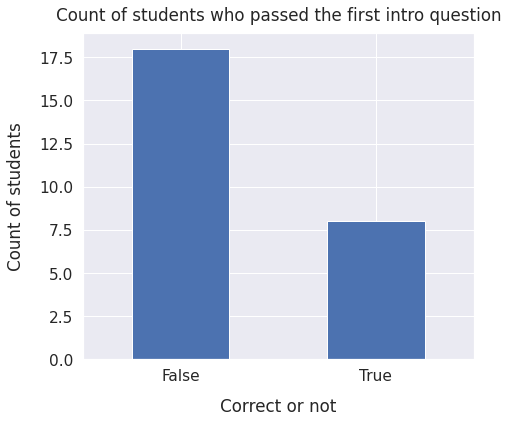

In [17]:
sns.set(font_scale=1.4)
df_final[df_final["Question"] == "Frequência angular com Lissajous 2"]["Correct"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Correct or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the first intro question", y=1.02);

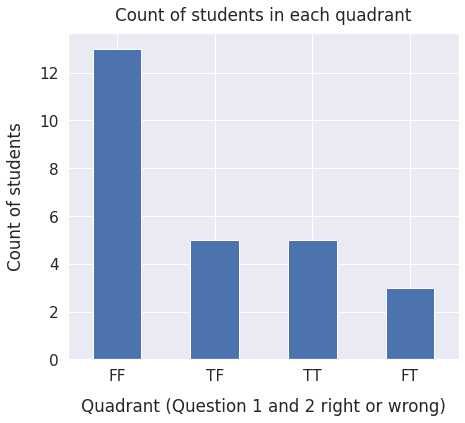

In [39]:
df_final[['student', 'quadrant']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (Question 1 and 2 right or wrong)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each quadrant", y=1.02);